# Quora Exploratory Data Analysis
Brittany Bennett  
11/20/2018  

## Competition Description  
An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.  

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.  

In this competition, Kagglers will develop models that identify and flag insincere questions. To date, Quora has employed both machine learning and manual review to address this problem. With your help, they can develop more scalable methods to detect toxic and misleading content.  

Here's your chance to combat online trolls at scale. Help Quora uphold their policy of “Be Nice, Be Respectful” and continue to be a place for sharing and growing the world’s knowledge.  

## Data Description  
In this competition you will be predicting whether a question asked on Quora is sincere or not.  

An insincere question is defined as a question intended to make a statement rather than look for helpful answers. Some characteristics that can signify that a question is insincere:  

Has a non-neutral tone  
-  Has an exaggerated tone to underscore a point about a group of people  
-  Is rhetorical and meant to imply a statement about a group of people  
-  Is disparaging or inflammatory  
Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
-  Makes disparaging attacks/insults against a specific person or group of people  
-  Based on an outlandish premise about a group of people  
-  Disparages against a characteristic that is not fixable and not measurable  
Isn't grounded in reality
-  Based on false information, or contains absurd assumptions  
-  Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers  

The training data includes the question that was asked, and whether it was identified as insincere (target = 1). The ground-truth labels contain some amount of noise: they are not guaranteed to be perfect.  

Note that the distribution of questions in the dataset should not be taken to be representative of the distribution of questions asked on Quora. This is, in part, because of the combination of sampling procedures and sanitization measures that have been applied to the final dataset.  

**File descriptions**
-  train.csv - the training set
-  test.csv - the test set
-  sample_submission.csv - A sample submission in the correct format

### enbeddings/ - (see below)
Data fields  
qid - unique question identifier  
question_text - Quora question text  
target - a question labeled "insincere" has a value of 1, otherwise 0  
This is a Kernels-only competition. The files in this Data section are downloadable for reference in Stage 1. Stage 2 files will only be available in Kernels and not available for download.  

What will be available in the 2nd stage of the competition?  
In the second stage of the competition, we will re-run your selected Kernels. The following files will be swapped with new data:  

test.csv - This will be swapped with the complete public and private test dataset. This file will have ~56k rows in stage 1 and ~376k rows in stage 2. The public leaderboard data remains the same for both versions. The file name will be the same (both test.csv) to ensure that your code will run.
sample_submission.csv - similar to test.csv, this will be changed from ~56k in stage 1 to ~376k rows in stage 2 . The file name will remain the same.



## Let's Get This Party Started

In [1]:
import pandas as pd
import random
import seaborn as sns

### Taking a Peak 
#### Test Data
We can take a quick look at the data to see what we're working with. We see that "qid" corresponds to the unique question identified ('question id'), and the question_text contains a unique string of the question.

There are 56,370 separate questions.  

In [2]:
test = pd.read_csv("data/test.csv")
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [3]:
test.count()

qid              56370
question_text    56370
dtype: int64

In [4]:
test.iloc[random.randint(1,56370),1]

'Who is better liar Modi or Arun Jaitley?'

In [5]:
test.iloc[random.randint(1,56370),1]

'Where do I find the anonymously answered questions?'

In [6]:
test.iloc[random.randint(1,56370),1]

'What sites can I download free books?'

### Training Data  
Out of the 1,306,122 questions in the training data set, 80,810 are classified as "insincere".

Random samples of these data show that insincere questions mention race, Trump, and politics to name a few topics.

In [7]:
train = pd.read_csv("data/train.csv")
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [8]:
train.count()

qid              1306122
question_text    1306122
target           1306122
dtype: int64

In [9]:
train.loc[train['target']== 1].count()

qid              80810
question_text    80810
target           80810
dtype: int64

In [10]:
train.loc[train['target']== 1].iloc[random.randint(1,56370),1]

'Why are the Telugus in NIT Durgapur so filthy and create mess everywhere?'

In [11]:
train.loc[train['target']== 1].iloc[random.randint(1,56370),1]

'How has Quora impacted a nation of control freaks and know-it-alls?'

In [12]:
train.loc[train['target']== 1].iloc[random.randint(1,56370),1]

'Why is it that every hate crime always turns out to be done by liberals?'

Let's take a look at a couple of random questions.

## I have some questions for you, sir 
Based on a my quick look at the data, I have a couple of questions to guide the first part of this EDA.  

-  Do any questions end in anything other than a question mark?
-  Does the length of the question correlate with insincerity?
-  What are the top words in the insincere questions, and..
-  What types of words are the most common in insincere questions? Nationalities? Races? Ethniciites? Countries?

### Do any questions end in anything other than a question mark?
Nope.

In [13]:
test.filter(regex=("$/?")).count()


qid              56370
question_text    56370
dtype: int64

### Does the length of the question correlate with insincerity?

In [14]:
train_words = train
train_words["word_count"] = train['question_text'].str.split().str.len()
train_words.head()

,qid,question_text,target,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15


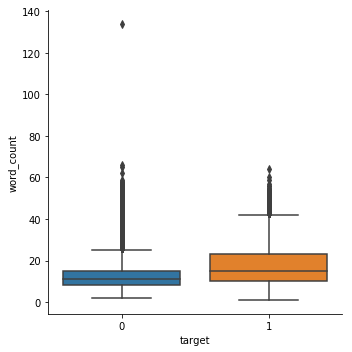

In [16]:
sns.catplot(x="target", y="word_count", kind = "box", data=train_words);


### Holy Outlier, Batman
Who's that skewing our data? Let's find out.

In [24]:
train_words.sort_values(by =["word_count"], ascending = False).head()

,qid,question_text,target,word_count
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0,134
253514,319da4906df672a86606,What is the value of k in $\begin {array} kx &...,0,66
24672,04d636e33c281a54bfac,Let A be a set of all integers between 0 to 10...,0,65
165040,2041ae71c5a8c0cba026,"To you, does being a Christian mean inviting ...",1,64
107684,1516e44503fe20d1f6d4,How can i reduce about 10 kgs in next 3 months...,0,62


And the culprit is... this ridiculous question by a Star Trek fan after my own heart. 

For the sake of our stats analysis, I'll take this lovely question out for now and put it in a safe place.

In [25]:
train_words.iloc[522266,1]

'In "Star Trek 2013" why did they :\n\n*Spoilers*\n*Spoilers*\n*Spoilers*\n*Spoilers*\n\n1)Make warping look quite a bit like an hyperspace jump\n2)what in the world were those bright particles as soon as they jumped.\n3)Why in the world did they make it possible for two entities to react in warp space in separate jumps.\n4)Why did Spock get emotions for this movie.\n5)What was the point of hiding the "Enterprise" underwater.\n6)When they were intercepted by the dark ship, how come they reached Earth when they were far away from her.(I don\'t seem to remember the scene where they warp to earth).\n7)How did the ship enter earth\'s atmosphere when it wasnt even in orbit.\n8)When Scotty opened the door of the black ship , how come pike and khan didn\'t slow down?'

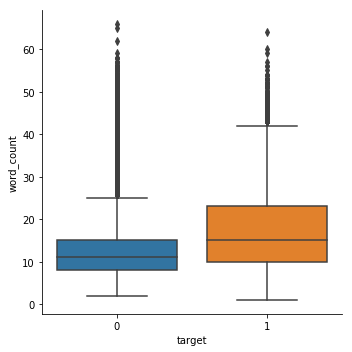

In [30]:
train_words = train_words.drop(train_words.index[522266])
sns.catplot(x="target", y="word_count", kind = "box", data=train_words);


This quick box plot shows that **Yes!**, the length of words is a question do seem to correlate with insincerity. The mean word count for insincere questions (17.3) is higher than the mean for sincere questions (12.5). The data for insincere questions are also skewed to a longer word count.  

In [32]:
train_words.loc[train['target']== 1]["word_count"].mean()

17.277812151961392

In [33]:
train_words.loc[train['target']== 0]["word_count"].mean()

12.508436647408939